In [1]:
pip list

Package                   Version
------------------------- -----------
anyio                     4.7.0
argon2-cffi               21.3.0
argon2-cffi-bindings      21.2.0
asttokens                 3.0.0
async-lru                 2.0.4
attrs                     24.3.0
babel                     2.16.0
beautifulsoup4            4.13.4
bleach                    6.2.0
Bottleneck                1.4.2
Brotli                    1.0.9
brotlicffi                1.0.9.2
certifi                   2025.6.15
cffi                      1.17.1
charset-normalizer        3.3.2
colorama                  0.4.6
comm                      0.2.1
contourpy                 1.3.1
cycler                    0.11.0
debugpy                   1.8.11
decorator                 5.1.1
defusedxml                0.7.1
et_xmlfile                2.0.0
exceptiongroup            1.2.0
executing                 0.8.3
fastjsonschema            2.20.0
fonttools                 4.55.3
greenlet                  3.1.1
h11             

In [2]:
import requests


In [3]:
api_key = "18882f5554ebe6be4605e90d9e617ff7"
city="Nairobi"
url = "http://api.openweathermap.org/data/2.5/weather"
#Parameters for the API reques
params={
    'q': city,
    'appid':api_key,
    'units':"metric",
    'exclude':'hourly'
 }


response = requests.get(url, params=params)
weather_data=response.json()
print(weather_data)

# Check the response
if response.status_code == 200:
    data = response.json()
    print(data)
else:
    print("Request failed:", response.status_code)# Check the response
if response.status_code == 200:
    data = response.json()
    print(data)
else:
    print("Request failed:", response.status_code)



{'coord': {'lon': 36.8167, 'lat': -1.2833}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 18.62, 'feels_like': 18.21, 'temp_min': 18.62, 'temp_max': 18.62, 'pressure': 1020, 'humidity': 64, 'sea_level': 1020, 'grnd_level': 841}, 'visibility': 10000, 'wind': {'speed': 2.3, 'deg': 99, 'gust': 2.05}, 'clouds': {'all': 68}, 'dt': 1753254330, 'sys': {'country': 'KE', 'sunrise': 1753241843, 'sunset': 1753285242}, 'timezone': 10800, 'id': 184745, 'name': 'Nairobi', 'cod': 200}
{'coord': {'lon': 36.8167, 'lat': -1.2833}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 18.62, 'feels_like': 18.21, 'temp_min': 18.62, 'temp_max': 18.62, 'pressure': 1020, 'humidity': 64, 'sea_level': 1020, 'grnd_level': 841}, 'visibility': 10000, 'wind': {'speed': 2.3, 'deg': 99, 'gust': 2.05}, 'clouds': {'all': 68}, 'dt': 1753254330, 'sys': {'country': 'K

In [4]:
## EXTRACT AND PRINT THE RELEVANT INFORMATION
print(f"City:{weather_data['name']}")
print(f"Temperature: {weather_data['main']['temp']}°C")
print(f"Weather: {weather_data['weather'][0]['description']}")


City:Nairobi
Temperature: 18.62°C
Weather: broken clouds


### WRITING A CODE THAT FETCHES WEATHER DATA FOR THE GIVEN CITY USING THE OPENWEATHER MAP AI

In [5]:
import requests

def get_weather_data(city_name, api_key):
    """
    Parameters:
    - city_name (str): Name of the city
    - api_key (str): Your OpenWeatherMap API key

    Returns:
    - dict: Weather data as dictionary, or an error message
    """
    base_url = "http://api.openweathermap.org/data/2.5/weather"
    params = {
        'q': city_name,
        'appid': api_key,
        'units': 'metric'
    }

    try:
        response = requests.get(base_url, params=params)
        response.raise_for_status()  # Raises HTTPError for bad responses
        data = response.json()

        weather = {
            'city': data['name'],
            'country': data['sys']['country'],
            'temperature': data['main']['temp'],
            'description': data['weather'][0]['description'],
            'humidity': data['main']['humidity'],
            'wind_speed': data['wind']['speed']
        }

        return weather

    except requests.exceptions.HTTPError as err:
        return {'error': f"HTTP error occurred: {err}"}
    except requests.exceptions.RequestException as err:
        return {'error': f"Request failed: {err}"}
    except KeyError:
        return {'error': "Invalid response received. Check city name or API key."}


In [6]:
api_key = "18882f5554ebe6be4605e90d9e617ff7"
city ="Nairobi"

weather_info=get_weather_data(city,api_key)

if 'error' in weather_info:
    print(weather_info["error"])
else:
    print(f"{weather_info['city']},{weather_info['country']}")
    print(f"temperature: {weather_info['temperature']}°C")
    print(f"description: {weather_info['description']}")
    print(f"humidity: {weather_info['humidity']}%")
    print(f"wind_speed: {weather_info['wind_speed']}m/s")

Nairobi,KE
temperature: 18.62°C
description: broken clouds
humidity: 64%
wind_speed: 2.3m/s


In [7]:
api_key = "18882f5554ebe6be4605e90d9e617ff7"
city = "Nairobi"

weather_info = get_weather_data(city, api_key)

if 'error' in weather_info:
    print(weather_info["error"])
else:
    print(f"{weather_info['city']}: {weather_info['country']}")
    print(f"Temperature: {weather_info['temperature']}°C")
    print(f"Description: {weather_info['description']}")
    print(f"Humidity: {weather_info['humidity']}%")
    print(f"Wind Speed: {weather_info['wind_speed']} m/s")


Nairobi: KE
Temperature: 18.62°C
Description: broken clouds
Humidity: 64%
Wind Speed: 2.3 m/s


In [8]:
name="Hellen"
print(f"Hello",name)

Hello Hellen


### aANOTHER OPTION TO FETCH DATA

In [45]:
def get_worldbank_data (country_code, indicator_code, indicator_name, date_range):
    '''
    get_worldbank_data gets development indicator data
    for a given country.

    Params:
    country_name:
    indicator_code:

    Returns:
    dataframe of the indicator per year over a given year range.
    '''
    url=f"https://api.worldbank.org/v2/country/{countrycode}/indicator/{indicator_id}"

params={
    'date': date_range,
    'format':'json'
       }

    # SEND THE GET REQUESTS TO THE API
response=requests.get(url,params=params)

    #PROCESS RETURNED DATA
if  response.status_code==200:    
     indicator_data = response.json()
         #FILTER THE RETURNED DATA t
     indicator_data=indicator_data[1]
# CONVERT THE LIST OF DICTIONARIES INTO A DATAFRAME
     indicator_data=pd.DataFrame(indicator_data)

#CLEAN UP THE DATAFRAME
     indicator_data=indicator_data[["date","value"]]
#RENAME THE COLUMNS
     indicator_data=indicator_data.rename(columns={"date":"Year","value":f'{indicator}'})
     return indicator_data
    
else:
               print("Error getting indicator data",response.status_code)
               


SyntaxError: 'return' outside function (1591388075.py, line 35)

In [ ]:
## Get GDP data for Kenya for 2008:2002
date_range="2008:2022"

#CALL THE FUNCTION TO GET THE DATAFRAME
gdp_df = get_worldbank_data("KE", "SP.DYN.TFRT.IN", "fertility",date_range)


fertility_df=get_worldbank_data("KE", "SP.DYN.TFRT.IN", "fertility",date_range)
fertility_df

In [9]:
### Getting World Bank data via API for the UK



countrycode="GB"
indicator_id="NY.GDP.MKTP.CD"
date_range="2007:2022"
#Data Source
base_url=f"https://api.worldbank.org/v2/country/{countrycode}/indicator/{indicator_id}"

#set the parameters for the request
params = {
      'date':date_range,
      'format':'json'
}

#Send a GET request to the remote source
response = requests.get(base_url,params)

#Process returned data
if response.status_code==200:    
    dev_data = response.json()
     #filter the returned data 
    gb_data = dev_data[1]
    import pandas as pd
##Convert the list of dictionaries into a dataframe
    gb_df = pd.DataFrame(gb_data)

#CLEAN THE df
    gb_df = gb_df[["date","value"]]
##RENAME THE COLUMNS
    gb_df = gb_df.rename(columns={"date":"Year","value":"GDP_USD"})


else:
    pass
    
     

In [10]:
## TO FIND GDP AND FERTILITY GAP, population and life expectancy  DATA 2007 TO 2022 AND MERGE WITH GAPMINDER DATA
gb_df

,Year,GDP_USD
0,2022,3.114042e+12
1,2021,3.143323e+12
2,2020,2.696778e+12
3,2019,2.851407e+12
4,2018,2.871340e+12
5,2017,2.680148e+12
6,2016,2.689107e+12
7,2015,2.927911e+12
8,2014,3.064708e+12
9,2013,2.784854e+12


### ## TO FIND GDP AND FERTILITY GAP, population and life expectancy  DATA 2007 TO 2022 AND MERGE WITH GAPMINDER DATA

In [11]:

import requests
countrycode = "KE"
date_range = "2007:2022"
indicator_id = "SP.DYN.LE00.IN"
base_url = f"https://api.worldbank.org/v2/country/{countrycode}/indicator/{indicator_id}"
params = {"date":date_range,
        "format": "json"
         }
response=requests.get(base_url,params)
if response.status_code==200:
   dev_data = response.json()
if isinstance(dev_data, list) and len(dev_data) > 1 and dev_data[1] is not None:
   life_exp = dev_data[1]
    
   import pandas as pd
   life_df = pd.DataFrame(life_exp)
   life_df = life_df[["date", "value"]]
   life_df = life_df.rename(columns={"date": "Year", "value": "LIFE_EXP"})
else:
     pass
print(life_df)

    Year  LIFE_EXP
0   2022    63.549
1   2021    61.225
2   2020    61.596
3   2019    62.939
4   2018    62.825
5   2017    62.725
6   2016    62.526
7   2015    62.279
8   2014    61.990
9   2013    61.729
10  2012    61.537
11  2011    61.283
12  2010    60.915
13  2009    60.483
14  2008    59.955
15  2007    59.407


In [12]:
import requests
import pandas as pd

# Parameters
countrycode = "KE"
date_range = "2007:2022"
indicator_id = "SP.DYN.TFRT.IN"  # Fertility rate

# API URL
base_url = f"https://api.worldbank.org/v2/country/{countrycode}/indicator/{indicator_id}"

# API parameters
params = {
    "date": date_range,
    "format": "json"
}

# Send the request
response = requests.get(base_url, params=params)

# Check response
if response.status_code == 200:
    dev_data = response.json()
    
    # Check if data is available
    if isinstance(dev_data, list) and len(dev_data) > 1 and dev_data[1] is not None:
        fert_data = dev_data[1]

        # Convert to DataFrame
        fert_df = pd.DataFrame(fert_data)

        # Keep only relevant columns
        fert_df = fert_df[["date", "value"]]

        # Rename for clarity
        fert_df = fert_df.rename(columns={"date": "Year", "value": "FERT_RATE"})

        # Show the result
        print(fert_df)
    else:
        print("❗No data found. Check country code, indicator ID, or year range.")
else:
    print(f"❌ Request failed with status code {response.status_code}")


    Year  FERT_RATE
0   2022      3.262
1   2021      3.312
2   2020      3.364
3   2019      3.433
4   2018      3.536
5   2017      3.609
6   2016      3.689
7   2015      3.766
8   2014      3.843
9   2013      3.955
10  2012      4.116
11  2011      4.284
12  2010      4.446
13  2009      4.567
14  2008      4.660
15  2007      4.718


In [13]:
import requests
import pandas as pd

# Parameters
countrycode = "KE"
date_range = "2007:2022"
indicator_id = "SP.POP.TOTL"

# API URL
base_url = f"https://api.worldbank.org/v2/country/{countrycode}/indicator/{indicator_id}"

# API parameters
params = {
    "date": date_range,
    "format": "json"
}

# Send the request
response = requests.get(base_url, params=params)

# Check response
if response.status_code == 200:
    dev_data = response.json()

    # Check if the data exists
    if isinstance(dev_data, list) and len(dev_data) > 1 and dev_data[1] is not None:
        pop_data = dev_data[1]
        
        # Convert to DataFrame
        pop_df = pd.DataFrame(pop_data)

        # Keep relevant columns
        pop_df = pop_df[["date", "value"]]

        # Rename for clarity
        pop_df = pop_df.rename(columns={"date": "Year", "value": "POP_TOT"})

        # Show the result
        print(pop_df)
    else:
        print("❗No data found in the response.")
else:
    print(f"❌ Request failed with status code {response.status_code}")


    Year   POP_TOT
0   2022  54252461
1   2021  53219166
2   2020  52217334
3   2019  51202827
4   2018  50207107
5   2017  49197766
6   2016  48139687
7   2015  47088526
8   2014  46051440
9   2013  44986791
10  2012  43888303
11  2011  42758461
12  2010  41598567
13  2009  40408891
14  2008  39206351
15  2007  38036349


In [14]:
import pandas as pd
gapminder_data=pd.read_csv("../data/gapminder.csv")

gapminder_kenya = gapminder_data[gapminder_data['country'] == 'Kenya'].copy()

#Rename columns to avoid confusion when merging 
gapminder_kenya.rename(columns={
    'year': "Year",
    'life_exp':"LIFE_EXP", 
    'pop':"POP_TOT",
    'gdp_per_cap':"GDP_USD",
    'fertility':"FERT_RATE"
}, inplace=True)

#Drop continent and counrty
gapminder_kenya=gapminder_kenya[["Year","LIFE_EXP","POP_TOT","FERT_RATE","GDP_USD"]]

print(gapminder_kenya.columns)

Index(['Year', 'LIFE_EXP', 'POP_TOT', 'FERT_RATE', 'GDP_USD'], dtype='object')


### MERGING THE DATASETS

In [15]:
#first merge GDP and Life expectancy
merged_df=pd.merge(gb_df,life_df,on="Year",how="inner")

## second merge the merged and Population
merged_df=pd.merge(merged_df,pop_df,on="Year",how="inner")


## second merge the merged and Fertility gap
merged_df=pd.merge(merged_df, fert_df,on="Year",how="inner")

print(merged_df)



    Year       GDP_USD  LIFE_EXP   POP_TOT  FERT_RATE
0   2022  3.114042e+12    63.549  54252461      3.262
1   2021  3.143323e+12    61.225  53219166      3.312
2   2020  2.696778e+12    61.596  52217334      3.364
3   2019  2.851407e+12    62.939  51202827      3.433
4   2018  2.871340e+12    62.825  50207107      3.536
5   2017  2.680148e+12    62.725  49197766      3.609
6   2016  2.689107e+12    62.526  48139687      3.689
7   2015  2.927911e+12    62.279  47088526      3.766
8   2014  3.064708e+12    61.990  46051440      3.843
9   2013  2.784854e+12    61.729  44986791      3.955
10  2012  2.707090e+12    61.537  43888303      4.116
11  2011  2.663806e+12    61.283  42758461      4.284
12  2010  2.485483e+12    60.915  41598567      4.446
13  2009  2.412840e+12    60.483  40408891      4.567
14  2008  2.929412e+12    59.955  39206351      4.660
15  2007  3.090510e+12    59.407  38036349      4.718


In [16]:
###merge the merged data and gapmindder_kenya

merged_df["Year"] = merged_df["Year"].astype(int)
gapminder_kenya["Year"] = gapminder_kenya["Year"].astype(int)

final_df=pd.merge(merged_df,gapminder_kenya,on="Year",how="outer")

final_df

,Year,GDP_USD_x,LIFE_EXP_x,POP_TOT_x,FERT_RATE_x,LIFE_EXP_y,POP_TOT_y,FERT_RATE_y,GDP_USD_y
0,1952,NaN,NaN,NaN,NaN,42.270,6464046.0,NaN,853.540919
1,1957,NaN,NaN,NaN,NaN,44.686,7454779.0,NaN,944.438315
2,1962,NaN,NaN,NaN,NaN,47.949,8678557.0,8.04,896.966373
3,1967,NaN,NaN,NaN,NaN,50.654,10191512.0,8.13,1056.736457
4,1972,NaN,NaN,NaN,NaN,53.559,12044785.0,8.01,1222.359968
5,1977,NaN,NaN,NaN,NaN,56.155,14500404.0,7.70,1267.613204
6,1982,NaN,NaN,NaN,NaN,58.766,17661452.0,7.27,1348.225791
7,1987,NaN,NaN,NaN,NaN,59.339,21198082.0,6.60,1361.936856
8,1992,NaN,NaN,NaN,NaN,59.285,25020539.0,5.67,1341.921721
9,1997,NaN,NaN,NaN,NaN,54.407,28263827.0,5.10,1360.485021


### TO  CONCATE THE GAPMINDER AND THE MERGED DATA


In [17]:
##HOW TO CONCAT
#s1 = pd.Series([])
#s2 = pd.Series(['c', 'd'])
#pd.concat([s1, s2])


combined_df=pd.concat([merged_df, gapminder_kenya],join ="inner", ignore_index=True)
combined_df['Year']=combined_df['Year'].astype(int)
combined_df = combined_df.sort_values('Year', ascending=False)
combined_df


,Year,GDP_USD,LIFE_EXP,POP_TOT,FERT_RATE
0,2022,3.114042e+12,63.549,54252461.0,3.262
1,2021,3.143323e+12,61.225,53219166.0,3.312
2,2020,2.696778e+12,61.596,52217334.0,3.364
3,2019,2.851407e+12,62.939,51202827.0,3.433
4,2018,2.871340e+12,62.825,50207107.0,3.536
5,2017,2.680148e+12,62.725,49197766.0,3.609
6,2016,2.689107e+12,62.526,48139687.0,3.689
7,2015,2.927911e+12,62.279,47088526.0,3.766
8,2014,3.064708e+12,61.990,46051440.0,3.843
9,2013,2.784854e+12,61.729,44986791.0,3.955


### DATA VISUALIZATION OF THE ABOVE MERGED DATA

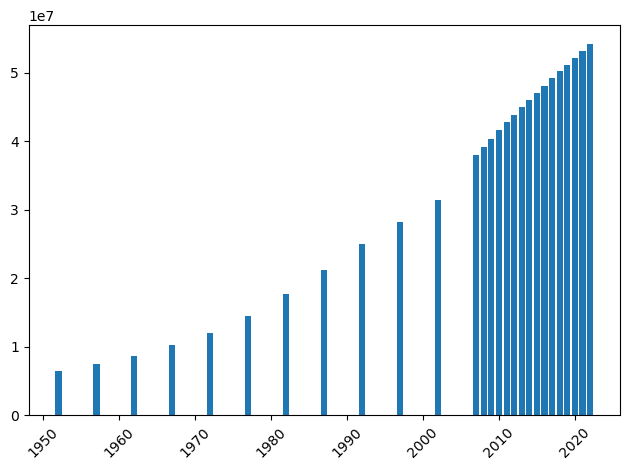

In [18]:
import matplotlib.pyplot as plt
import numpy as np
x=combined_df["Year"]
y=combined_df["POP_TOT"]
plt.bar(x,y)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

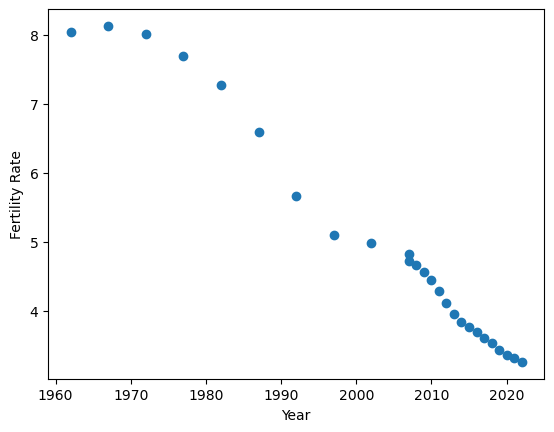

In [19]:
import matplotlib.pyplot as plt
import numpy as np
x=combined_df["Year"]
y=combined_df["FERT_RATE"]
plt.scatter(combined_df["Year"],combined_df["FERT_RATE"])
plt.xlabel("Year")
plt.ylabel("Fertility Rate")
plt.show()

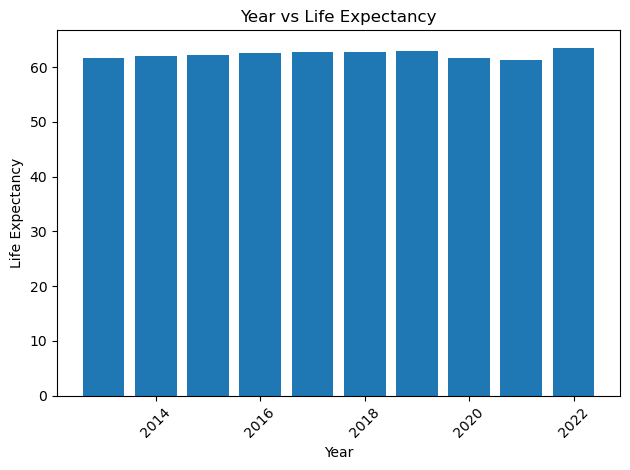

In [20]:
import matplotlib.pyplot as plt

# Example: selecting first 10 rows to plot
x = combined_df["Year"].head(10)
y = combined_df["LIFE_EXP"].head(10)

plt.bar(x, y)
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Year vs Life Expectancy")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

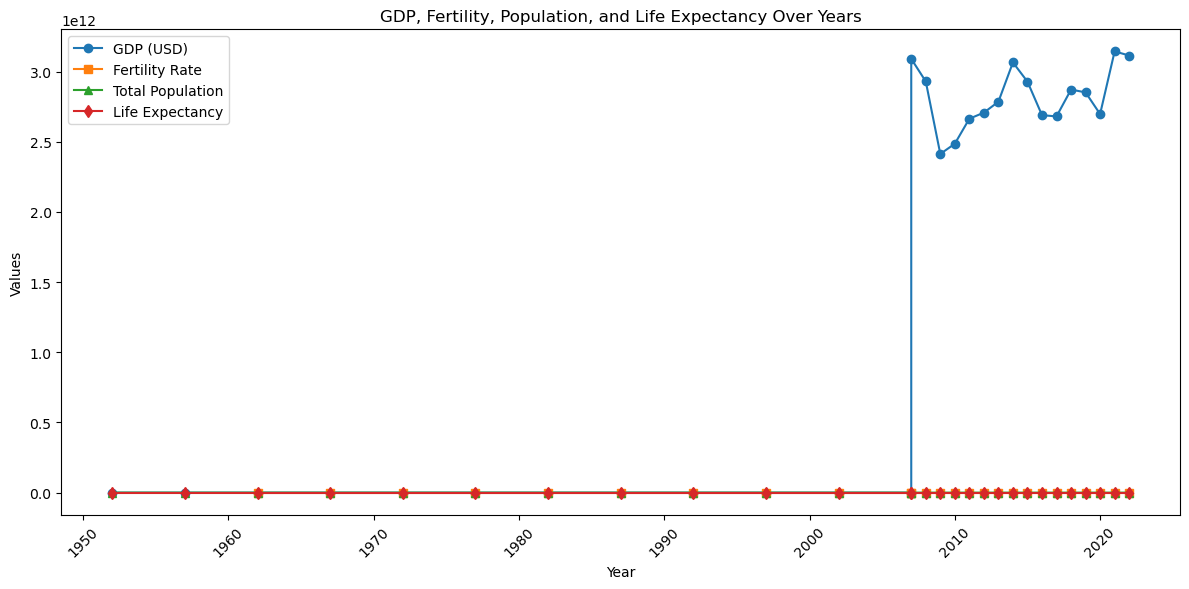

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(combined_df['Year'], combined_df['GDP_USD'], label='GDP (USD)', marker='o')
plt.plot(combined_df['Year'], combined_df['FERT_RATE'], label='Fertility Rate', marker='s')
plt.plot(combined_df['Year'], combined_df['POP_TOT'], label='Total Population', marker='^')
plt.plot(combined_df['Year'], combined_df['LIFE_EXP'], label='Life Expectancy', marker='d')

plt.xlabel('Year')
plt.ylabel('Values')
plt.title('GDP, Fertility, Population, and Life Expectancy Over Years')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
